In [1]:
import pandas as pd

train = pd.read_csv("data/train.csv")
train.head()

,Title,Tags,Abstract
0,Introducing C# Source Generators | .NET Blog,dynamic|dotnet|dev|csharp|source-generators|ex...,All the previous examples of source generators...
1,.NET 5 Source Generators Jump Start | Khalid A...,dotnet|dsl|tutorial|csharp|source-generators|m...,"In this post, we’ll start with nothing and go ..."
2,Awesome PICO-8 | Curated list of awesome lists...,resource|dev|console|pico-8|examples|games|ret...,"A curated list of PICO-8 resources, tutorials,..."
3,c# - Why are ToLookup and GroupBy different? -...,linq|dotnet|best-practice|dev|csharp|patterns|...,"ILookup has the handy indexer property, so it ..."
4,Classic Path.DirectorySeparatorChar gotchas wh...,dotnet|dev|csharp|linux|windows|cross-platform...,That '\\' is making a big assumption. A reason...


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=lambda x: x.split("|"))
tag_matrix = cv.fit_transform(train["Tags"])

unique_count = tag_matrix.shape[1]

unique_count
# cv.vocabulary_ 

798

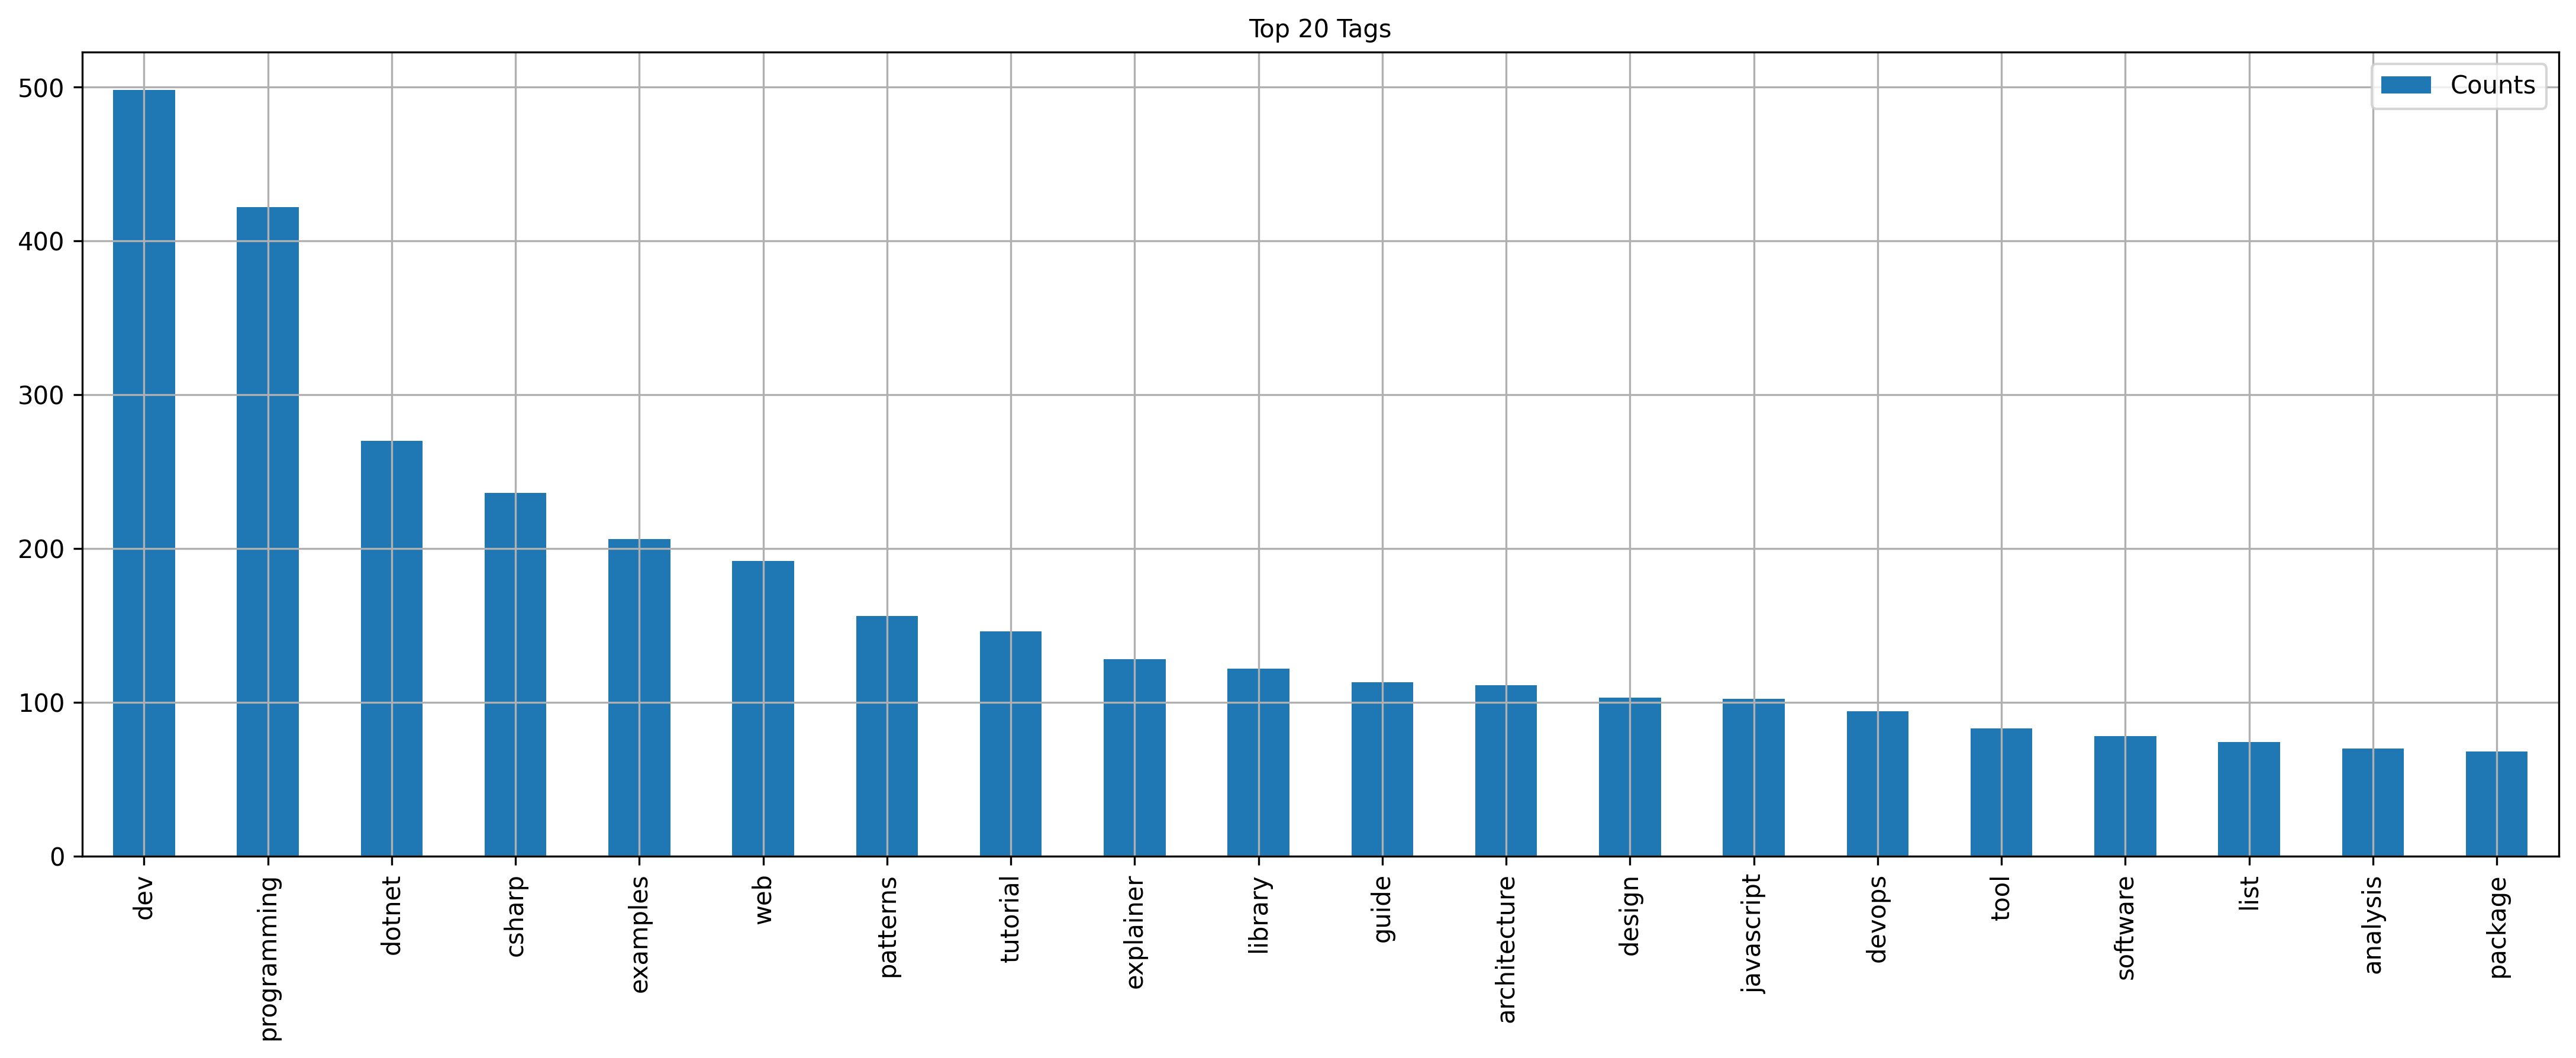

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

tags = cv.get_feature_names()

# Each row of the tag matrix represents a document, each column is a feature (word) 
# with the element containing the occurrence count of that feature in the document
counts = np.asarray(tag_matrix.sum(axis=0).A1)

tag_counts = list(zip(tags, counts))

tag_counts_by_count = dict(sorted(tag_counts, key=lambda x: x[1], reverse=True))

count_data = {"Tags": list(tag_counts_by_count.keys()), "Counts": list(tag_counts_by_count.values())}
count_data_frame = pd.DataFrame(data=count_data)

top_20_tags = count_data_frame.head(20)

fig = plt.figure(dpi=300, figsize=(18, 6))
top_20_tags.plot(ax=plt.gca(), x='Tags', y='Counts', kind='bar', fontsize=10, grid=True);
plt.xlabel("");
plt.title("Top 20 Tags", fontsize = 10);



In [44]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [45]:
import os
import re

from tqdm import tqdm

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# train['Title'].values

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

stopwords = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

abstracts_clean = []

for sentence in tqdm(train['Abstract'].values[:10]):
    sentence = decontracted(sentence)
    sentance = re.sub("\S*\d\S*", "", sentence).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentence)
    stemmed_sentence = []
    for e in sentence.split():
        if e.lower() not in stopwords:
            s=(sno.stem(lemmatizer.lemmatize(e.lower()))).encode('utf8')
            stemmed_sentence.append(s)
    sentence = b' '.join(stemmed_sentence)
    abstracts_clean.append(sentence)

abstracts_clean
    
train['AbstractClean'] = abstracts_clean #adding a column of CleanedText which displays the data after pre-processing of the review 
train['AbstractClean'] = data_no_dup['CleanedSynopsis'].str.decode("utf-8")



100%|██████████| 10/10 [00:01<00:00,  5.77it/s]


[b"previous exampl sourc generat mention earlier pretti complex. let go basic one show key piec you'll need write sourc generator.",
 b"post, we'll start noth go creat sourc generat readi solution.",
 b'curat list pico-8 resources, tutorials, tool more. inspir awesom list thing. might also like awesome-lua awesome-love2d.',
 b'ilookup handi index property, use dictionary-lik (or lookup-like) manner, wherea groupbi not.',
 b'\\\\ make big assumption. reason one 2003, big one today. trim backslash start pass string. uri constructor start come thing mix match \\ / end truncat url resolve.',
 b'open-sourc guid help write better command-lin programs, take tradit unix principl updat modern day.',
 b'collect interest code pattern particular order.',
 b'mssql-cli interact command line queri tool sql server. open sourc tool work cross-platform proud part dbcli community.',
 b'blog post answer follow questions: share mutabl state? problematic? problem avoided?',
 b'dstruct librari implement arou